In [4]:
import polars as pl
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'temparature'}>]], dtype=object)

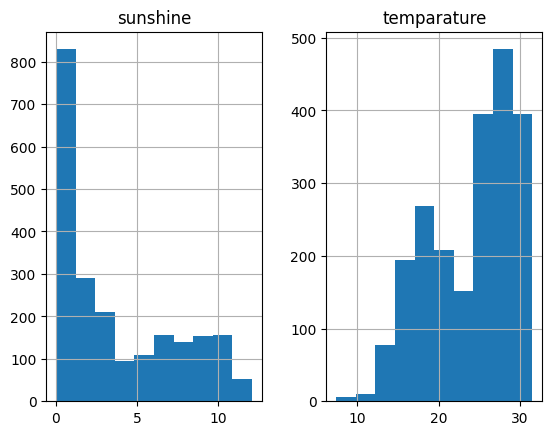

In [ ]:
df = pl.read_csv("./data/train.csv")
df.select(pl.exclude("id")).to_pandas().hist()

In [6]:
df.describe()

statistic,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2190.0,2190.0,2190.0,2190.0,2190.0,2190.0,2190.0,2190.0,2190.0,2190.0,2190.0,2190.0,2190.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1094.5,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.03653,75.721918,3.744429,104.863151,21.804703,0.753425
"""std""",632.342866,105.203592,5.655366,5.65433,5.22241,5.05912,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
"""min""",0.0,1.0,999.0,10.4,7.4,4.0,-0.3,39.0,2.0,0.0,10.0,4.4,0.0
"""25%""",547.0,89.0,1008.6,21.3,19.3,17.7,16.8,77.0,69.0,0.4,40.0,14.1,1.0
"""50%""",1095.0,179.0,1013.0,27.8,25.5,23.9,22.2,82.0,83.0,2.4,70.0,20.5,1.0
"""75%""",1642.0,270.0,1017.8,31.2,28.4,26.4,25.0,88.0,88.0,6.8,200.0,27.9,1.0
"""max""",2189.0,365.0,1034.6,36.0,31.5,29.8,26.7,98.0,100.0,12.1,300.0,59.5,1.0


array([[<Axes: xlabel='sunshine', ylabel='sunshine'>,
        <Axes: xlabel='temparature', ylabel='sunshine'>],
       [<Axes: xlabel='sunshine', ylabel='temparature'>,
        <Axes: xlabel='temparature', ylabel='temparature'>]], dtype=object)

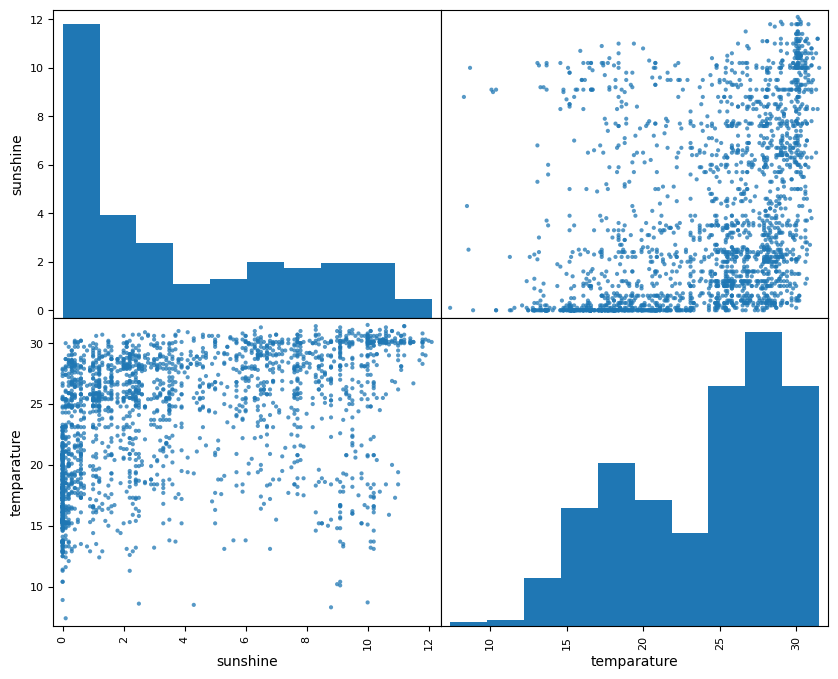

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.select(pl.col(["sunshine", "temparature"])).to_pandas(), figsize=(10, 8), alpha=0.75)

# Learnings
## General
- model to use: **binary classifier**
## Data Interdependencies
- maxtemp, temperature & mintemp are very closely related
  **-> pca to reduce model complexity**
- maxtemp, temperature, mintemp & pressure are cyclical
- maxtemp, temperature & mintemp are inversely related to pressure.
## Lags
- 1d lag for humidity
- 1d, 1w, 1y, 2y lag for rainfall
## Additional Variables
- days since last rained?
## Reduce Complexity